In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [ ]:
pd.set_option('display.max_columns', None) # optional - only for this example

loading the file from excel
- sheet is different from the default one
- data has some not usefull records, which will be skipped

In [ ]:
df = pd.read_excel('Canada.xlsx', sheet_name=1, skiprows=20, skipfooter=2)
df.head()

summarize data

In [ ]:
df.info()

check missing entry

In [ ]:
df.isnull().sum()

check the names of numerical and categorical columns

In [ ]:
print('columns with numeric data')
print(df.select_dtypes(include='number').columns.tolist())
print('columns with non numerica data')
print(df.select_dtypes(exclude='number').columns.tolist())

describe numerical data

In [ ]:
df.describe() # by default numeric columns are considered

describe non-numerical data

In [ ]:
df.describe(exclude='number')

### data wrangling

In [ ]:
df.head(10)

drop columns that are not required

In [ ]:
cols_to_drop = ['Type', 'Coverage', 'AREA','DEV','REG']
df.drop(columns=cols_to_drop, inplace=True)
df.head()

renaming the columns to something meaningful

In [ ]:
rename_dict = {'OdName':'Country',
                'AreaName':'Continent',
                'RegName':'Region',
                'DevName':'Status'}
df.rename(columns=rename_dict, inplace=True)
df.head()

add country wise total immigration

In [ ]:
years = list(range(1980,2014))
df['Total'] = df[years].sum(axis=1)
df.head()

since each country is unique, i will use country as index

In [ ]:
df.set_index('Country', inplace=True)
df.head()

## analysis
- analyse a country's trend of immigration
- compare multiple countries trends
- provive a trend comparing total immigration per year
- compare top five country immigration trend

In [ ]:
print(df.index.tolist())

In [ ]:
df.loc['Albania', years].plot(figsize=(15,5),
                              title="Albania's immigration trend",
                              style='ro--')

In [ ]:
df.loc['India', years].plot(kind='area',
                            figsize=(15,5),
                            title="India's immigration trend",
                            alpha=0.5)

In [ ]:
countries = ['India','Pakistan']
df.loc[countries, years].T.plot(figsize=(15,5), kind='area', alpha=0.6, stacked=False)

In [ ]:
df.sort_values(by='Total', ascending=False, inplace=True)

In [ ]:
df.head()[years].T

In [55]:
countries = df.head().index.tolist()
df.loc[countries, years].T

Country,India,China,United Kingdom of Great Britain and Northern Ireland,Philippines,Pakistan
1980,8880,5123,22045,6051,978
1981,8670,6682,24796,5921,972
1982,8147,3308,20620,5249,1201
1983,7338,1863,10015,4562,900
1984,5704,1527,10170,3801,668
1985,4211,1816,9564,3150,514
1986,7150,1960,9470,4166,691
1987,10189,2643,21337,7360,1072
1988,11522,2758,27359,8639,1334
1989,10343,4323,23795,11865,2261


<Axes: >

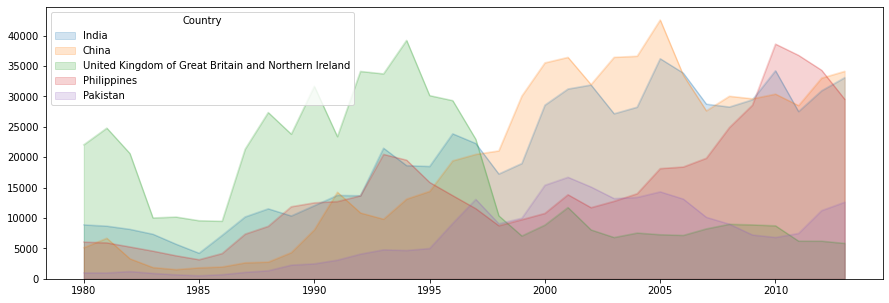

In [56]:
df.head()[years].T.plot(figsize=(15,5), kind='area', stacked=False, alpha=.2)

In [ ]:
df.loc['Philippines',years].plot(figsize=(15,5))

In [ ]:
df.loc['Philippines',years].plot(figsize=(15,5))

In [ ]:
df.loc['Philippines',years].mean()

In [ ]:
df.loc['Philippines',years].plot(figsize=(15,5))
plt.xticks(ticks=range(0, len(years)), labels=years, rotation=90)
plt.text(0, 35000, "Philippines migration trend", fontdict={'fontsize':'14'})
plt.annotate("1993\nimmigration\nspike", (13, 20000), (8, 25000), arrowprops={'arrowstyle':'->'})
plt.annotate("2010\nimmigration\nspike", (30, 39000), (25, 30000), arrowprops={'arrowstyle':'->'})
plt.vlines(30, 0, 50000, linestyles=':')
plt.vlines(13, 0, 50000, linestyles=':')
plt.hlines(df.loc['Philippines',years].mean(), 0, 34, linestyles=":", colors='red')
plt.text(0, df.loc['Philippines',years].mean()+600, "Avg Immigration 15000/yr")
plt.show()

In [ ]:
top5df = df.head()[years].T.copy()
top5df.head()

In [ ]:
px.area(top5df, x=top5df.index, 
        y=['India','China','Philippines'],
        )

In [ ]:
df[years].sum()

In [ ]:
year_wise_trend = df[years].sum()
fig = px.funnel(year_wise_trend,year_wise_trend.index, 
                     year_wise_trend.values,
                     title="Year wise Immigration Trend",
                     height=600)
fig.show()

In [ ]:
df.head()

In [ ]:
px.choropleth(
    data_frame=df,
    locations=df.index,
    locationmode='country names',
    color='Total',
    projection= 'orthographic',
    color_continuous_scale='Rainbow',
    height=600,
    width=1200,
)

In [ ]:
px.sunburst(
    data_frame=df,
    path=['Continent','Status','Region'],
    values='Total',
    names=df.index,
)

In [ ]:
px.treemap(
    data_frame=df,
    path=['Continent','Status','Region'],
    values='Total',
    names=df.index,
)

In [54]:
px.scatter_3d(
    df,
    x = 1980,
    y = 1981,
    z = 1982,
)